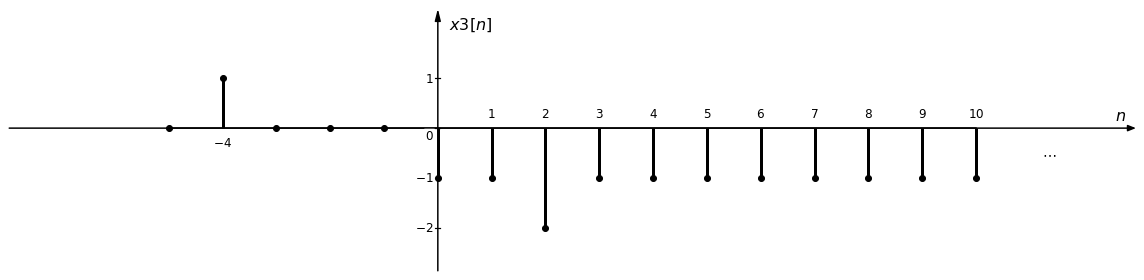

In [4]:
# Ejemplo 1 — Delta y escalón unitario

from signalblocks import DiscreteSignalPlotter

dsp = DiscreteSignalPlotter(figsize=[16, 4], xticks='auto', horiz_range=(-5, 10), yticks='fit')

dsp.add_signal("x[n] = delta[n+4]")
dsp.add_signal("x2[n]=delta[n-2]+u[n]")
dsp.add_signal("x3[n]=x[n]-x2[n]")
dsp.plot("x3")


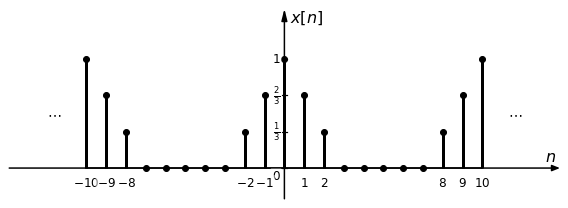

In [5]:
# Ejemplo 2 — Triángulo y desplazamiento temporal

from signalblocks import DiscreteSignalPlotter

dsp = DiscreteSignalPlotter(horiz_range=(-10, 10), yticks='fit', fraction_ticks=True)

# Definimos señal triangular desplazada
dsp.add_signal("x[n] = tri(n)", period=10)

dsp.plot("x")

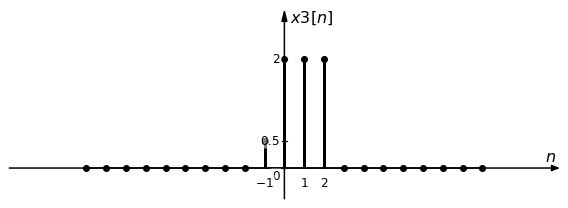

In [3]:
# Ejemplo 3 — Combinación de señales

from signalblocks import DiscreteSignalPlotter

dsp = DiscreteSignalPlotter(horiz_range=(-10, 10), yticks='fit')

dsp.add_signal("x1[n] = rect(n)")
dsp.add_signal("x2[n] = delta[n]")
dsp.add_signal("x3[n] = 2 * x1[n-1] + 0.5 * x2[n+1]")

dsp.plot("x3")

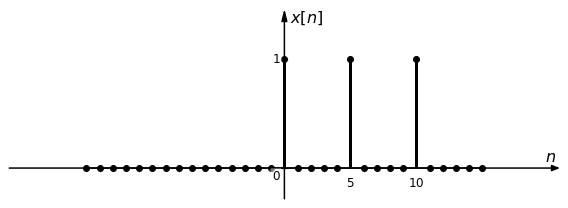

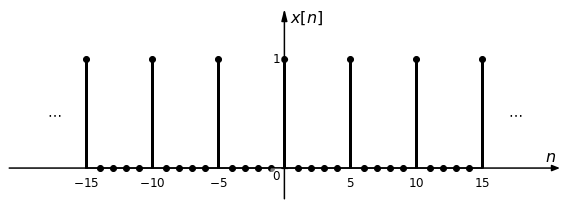

In [6]:
 # Ejemplo 4 — Señal periódica discreta (próxima extensión)

dsp = DiscreteSignalPlotter(horiz_range=(-15, 15), yticks='fit')

# Simular periodicidad manualmente por ahora
dsp.add_signal("x[n] = delta(n) + delta(n-5) + delta(n-10)")
dsp.plot("x")


dsp.add_signal("x[n] = delta(n)", period=5)
dsp.plot("x")


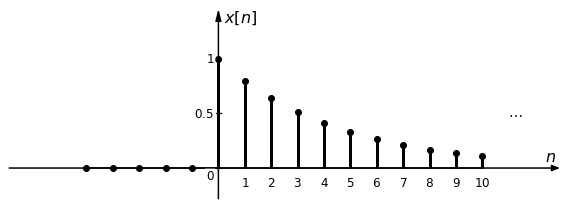

In [2]:
# Ejemplo 5 — Señal exponencial

dsp = DiscreteSignalPlotter(horiz_range=(-5, 10))

# Señal causal exponencial decreciente
dsp.add_signal("x[n] = (0.8)**n * u(n)")
dsp.plot("x")

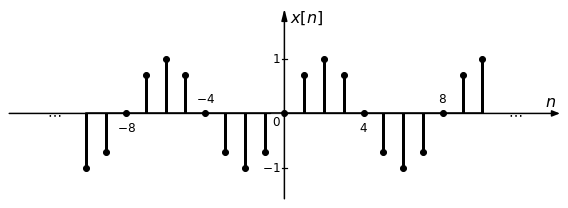

In [9]:
# Ejemplo 6 — Señal seno discreta (frecuencia normalizada)

import numpy as np
from signalblocks import DiscreteSignalPlotter

dsp = DiscreteSignalPlotter(horiz_range=(-10, 10), xticks_delta=4)

# Señal sinusoidal discreta
w0 = np.pi / 4
dsp.add_signal(f"x[n] = sin({w0}*n)")
dsp.plot("x")

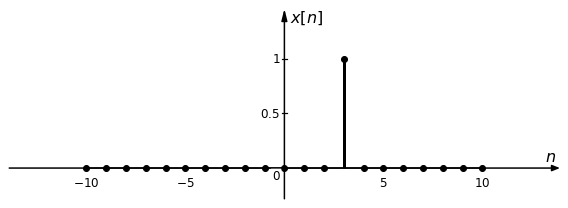

In [7]:
# Ejemplo 6 — Señal seno discreta (frecuencia normalizada)

import numpy as np
from signalblocks import DiscreteSignalPlotter

dsp = DiscreteSignalPlotter(horiz_range=(-10, 10), xticks_delta=5)

# Señal sinusoidal discreta
w0 = np.pi / 4
dsp.add_signal(f"x[n] = delta[n-3]")
dsp.plot("x")

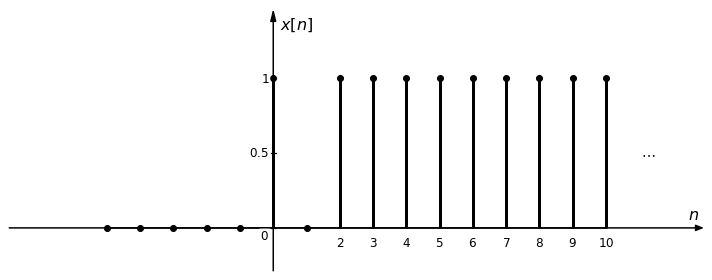

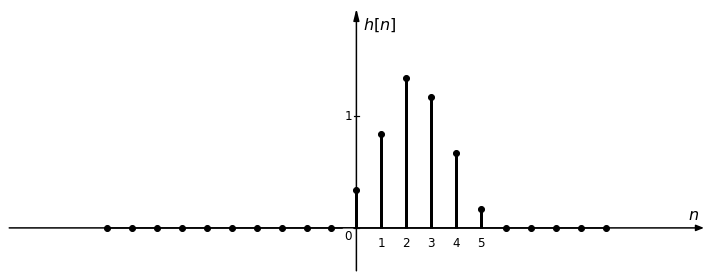

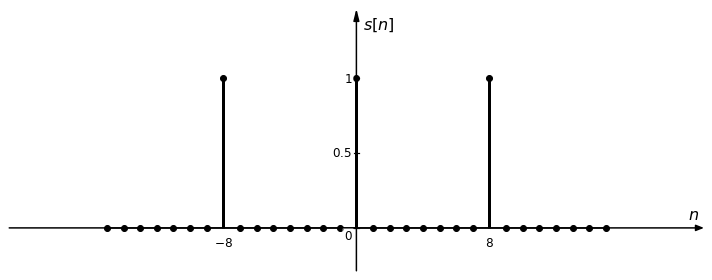

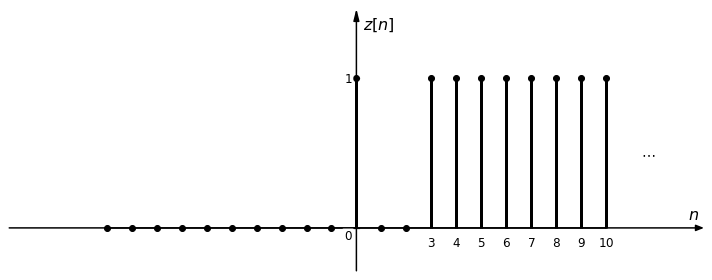

In [4]:
# DiscreteSignalPlotter demonstration

from signalblocks import DiscreteSignalPlotter
import numpy as np

# Example 1: Simple impulses and step
dsp = DiscreteSignalPlotter(horiz_range=(-5, 10), figsize=(10, 4))

# Define: x[n] = delta(n) + delta(n-2) + u(n-3)
dsp.add_signal("x[n] = delta[n] + delta[n-2] + u[n-3]")
dsp.plot("x")

# Example 2: Delayed and flipped signal
dsp = DiscreteSignalPlotter(horiz_range=(-10, 10), figsize=(10, 4))

# Define: h[n] = tri(n-2) + 0.5*tri(-n+3)
dsp.add_signal("h[n] = tri(n-2) + 0.5*tri(-n+3)", label="h[n]")
dsp.plot("h")

# Example 3: Sinusoidal + impulse train
dsp = DiscreteSignalPlotter(horiz_range=(-15, 15), figsize=(10, 4))

# Define periodic impulse train + cosine
dsp.add_signal("s[n] = cos(pi*n/4) * (delta(n) + delta(n-8) + delta(n+8))")
dsp.plot("s")

# Example 4: Combination of unit step and sinc
dsp = DiscreteSignalPlotter(horiz_range=(-10, 10), figsize=(10, 4))

dsp.add_signal("z[n] = sinc(n) + u(n-3)", label="z[n]")
dsp.plot("z")

dsp.add_signal("x2[n] = s[n] + z[n-3]", label="x2[n]") 


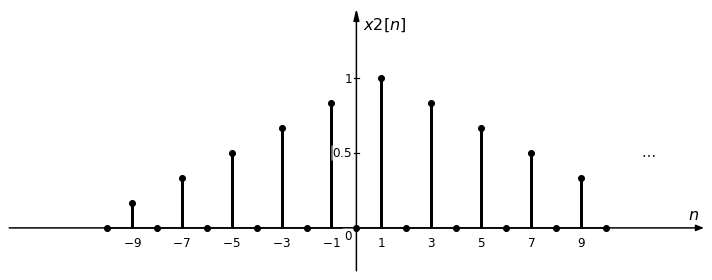

In [8]:
from signalblocks import DiscreteSignalPlotter
import numpy as np

dsp = DiscreteSignalPlotter(horiz_range=(-10, 10), figsize=(10, 4))

# Define: x[n] = delta(n) + delta(n-2) + u(n-3)
dsp.add_signal("x[n] = tri(n)")
dsp.add_signal("x2[n]=x[(n-1)/2]")
dsp.plot("x2")


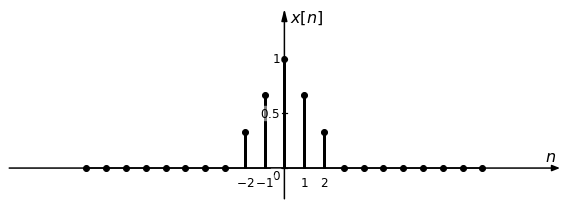

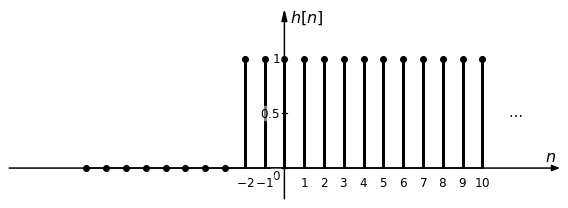

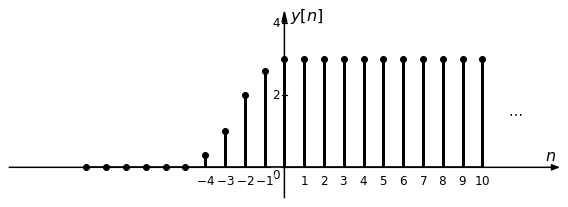

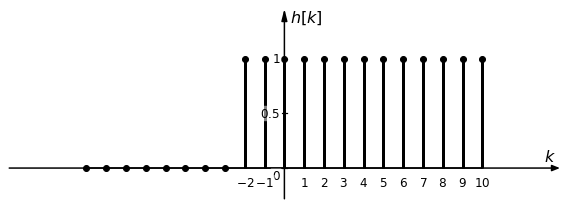

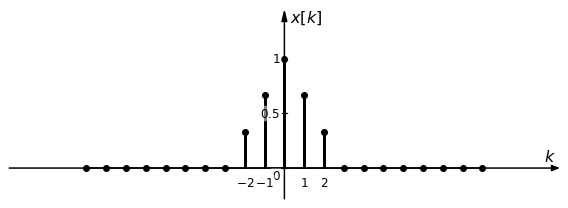

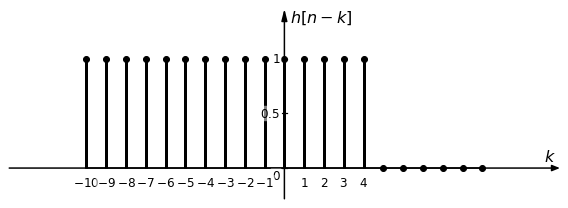

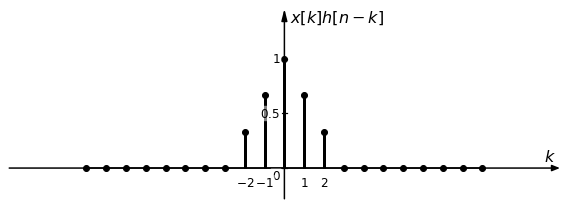

In [9]:
from signalblocks import DiscreteSignalPlotter

dsp = DiscreteSignalPlotter(horiz_range=(-10, 10), xticks='auto', figsize=(8, 3))

dsp.add_signal("x[n] = tri(n)")
dsp.add_signal("h[n] = u(n+2)")
dsp.plot('x')
dsp.plot('h')
dsp.add_signal("y[n]=conv(x[n], h[n])")
dsp.plot('y')
dsp.plot_convolution_steps("x", "h", n_actual=2)


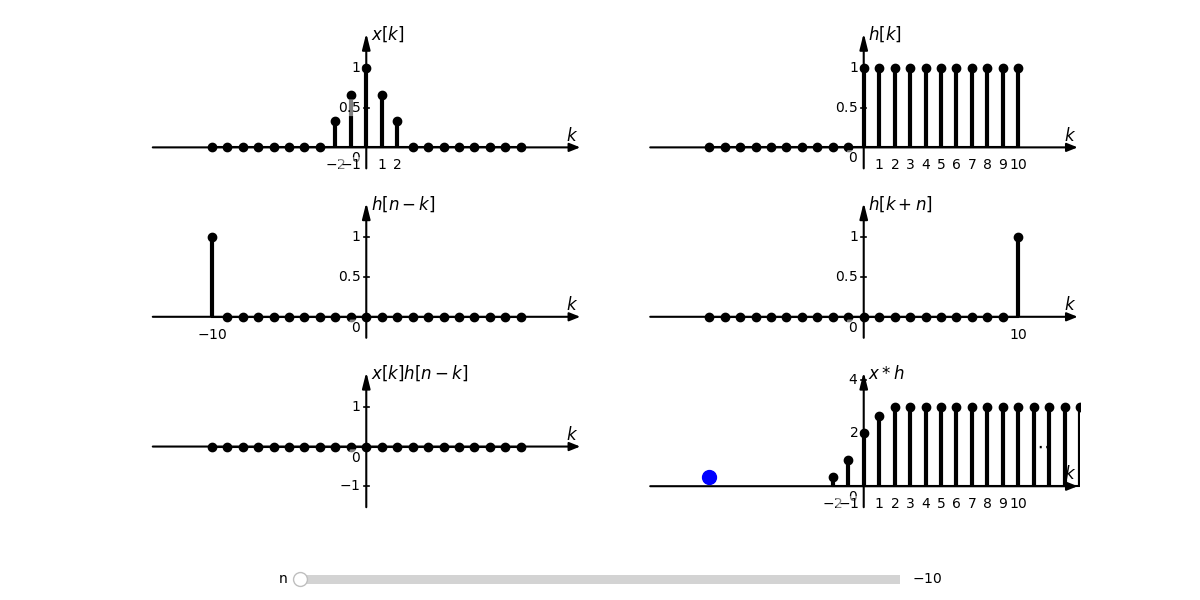

RuntimeError: x must be a sequence

RuntimeError: x must be a sequence

RuntimeError: x must be a sequence

RuntimeError: x must be a sequence

RuntimeError: x must be a sequence

RuntimeError: x must be a sequence

RuntimeError: x must be a sequence

RuntimeError: x must be a sequence

RuntimeError: x must be a sequence

RuntimeError: x must be a sequence

RuntimeError: x must be a sequence

RuntimeError: x must be a sequence

RuntimeError: x must be a sequence

RuntimeError: x must be a sequence

RuntimeError: x must be a sequence

RuntimeError: x must be a sequence

RuntimeError: x must be a sequence

In [10]:
%matplotlib widget

from signalblocks import DiscreteSignalPlotter

dsp = DiscreteSignalPlotter(horiz_range=(-10, 10), figsize=(6, 2))

dsp.add_signal("x[n] = tri(n)", xticks=[1, 4])
dsp.add_signal("h[n] = u(n)")
dsp.convolution_anim("x", "h")


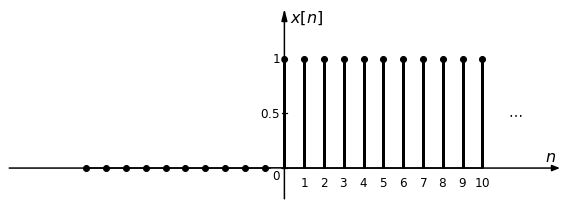

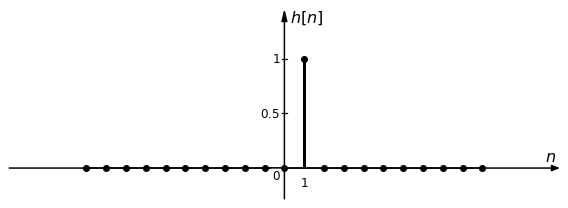

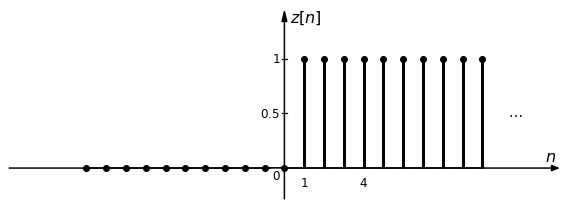

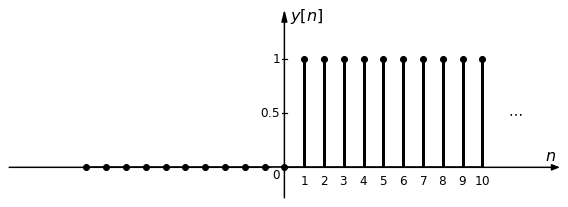

{'x': 'auto', 'h': 'auto', 'z': [1, 4], 'y': 'auto'}
{'x': 'auto', 'h': 'auto', 'z': 'auto', 'y': 'auto'}
{'x': None, 'h': None}


In [1]:
from signalblocks import DiscreteSignalPlotter

dsp = DiscreteSignalPlotter(horiz_range=(-10, 10), figsize=(8, 3))

dsp.add_signal("x[n] = u(n)")
dsp.add_signal("h[n] = delta[n-1]")
dsp.add_signal("z[n]=conv(x[n], h[n])", xticks=[1, 4])
dsp.plot('x')
dsp.plot('h')
dsp.plot('z')
dsp.plot_convolution('x','h')

print(dsp.signal_xticks)
print(dsp.signal_yticks)
print(dsp.signal_xticks_delta)

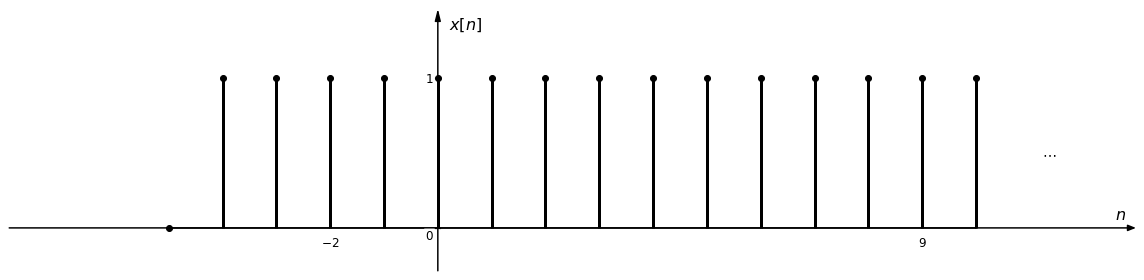

In [2]:
# Ejemplo 1 — Delta y escalón unitario

from signalblocks import DiscreteSignalPlotter

dsp = DiscreteSignalPlotter(figsize=[16, 4], xticks=[-2, 9], yticks='fit', horiz_range=(-5, 10))

dsp.add_signal("x[n] = u[n+4]")
dsp.plot("x")